[[-0.17382295]]
[4.5982984]


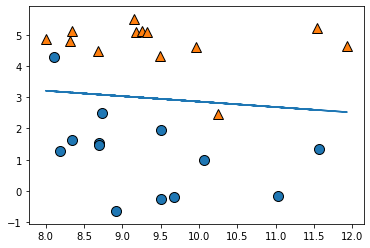

In [20]:
# Logistic Regression이 어떤 의미인지를 알아보아요!

import numpy as np
from sklearn import linear_model
import mglearn   # Dataset을 가져오기 위한 Utility module
import warnings  # warining을 출력하지 않도록 처리하기 위해서 import
import matplotlib.pyplot as plt   #  그래프 그리기 위해서 필요

# warning off
warnings.filterwarnings(action='ignore')

# Training Data Set
x,y = mglearn.datasets.make_forge()
# print(x)   # 좌표를 들고있어요!!(x축좌표, y축좌표)
# print(y)
mglearn.discrete_scatter(x[:,0], x[:,1], y)

# Linear Regression으로 학습해보아요!
# 가장 잘 표현하는 직선을 그릴꺼예요!
model = linear_model.LinearRegression()
model.fit(x[:,0].reshape(-1,1), x[:,1].reshape(-1,1))
print(model.coef_)         # Weight
print(model.intercept_)    # bias
plt.plot(x[:,0], x[:,0] * model.coef_.ravel() + model.intercept_)
plt.show()

기울기 : [[0.1292517]], 절편 : [-0.27210884]


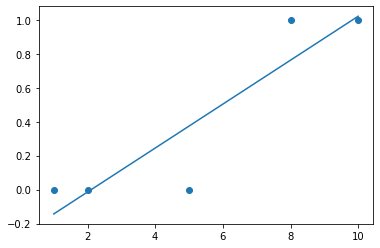

[[0.63265306]]
[5.97368421]


In [26]:
# logistic regression대신 linear regression을 이용해도 되나요?

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10])  # 공부시간
t_data = np.array([0, 0, 0, 1, 1])   # 합격여부(0: Fail, 1 : Pass)

model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

print('기울기 : {}, 절편 : {}'.format(model.coef_, model.intercept_))

plt.scatter(x_data,t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_)
plt.show()

print(model.predict([[7]]))   # [[0.63265306]]  => 0.5보다 크기때문에 Pass
# 그러면 시험에 통과하려면 적어도 몇시간 공부해야 하나요?
print((0.5 - model.intercept_) / model.coef_.ravel())  # [5.97368421]

기울기 : [[0.03500583]], 절편 : [0.17327888]


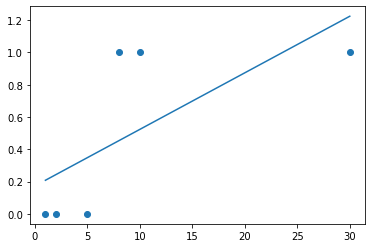

[[0.41831972]]
[9.33333333]


In [28]:
# logistic regression대신 linear regression을 이용해도 되나요?
# 왜 안되는지 알아보아요!!


import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10, 30])  # 공부시간
t_data = np.array([0, 0, 0, 1, 1, 1])   # 합격여부(0: Fail, 1 : Pass)

model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

print('기울기 : {}, 절편 : {}'.format(model.coef_, model.intercept_))

plt.scatter(x_data,t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_)
plt.show()

print(model.predict([[7]]))   # [[0.41831972]]  => 0.5보다 작기 때문에 Fail
# 그러면 시험에 통과하려면 적어도 몇시간 공부해야 하나요?
print((0.5 - model.intercept_) / model.coef_.ravel())  # [9.33333333]

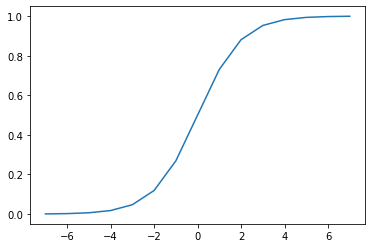

In [29]:
# Sigmoid 함수의 형태를 살펴보아요!!

import numpy as np
import matplotlib.pyplot as plt

x_data = np.arange(-7,8)
sigmoid_t_data = 1 / (1 + np.exp(-1 * x_data))

plt.plot(x_data,sigmoid_t_data)
plt.show()

In [36]:
# 간단하게 Logistic Regression을 순수 python과 tensorflow를 이용해서 
# 구현해 보아요!

# 공부시간에 따른 시험 합격여부에 대한 데이터로 학습 후 prediction을 해 보아요!
# 독립변수는 공부시간 1개만 사용

# %reset
import numpy as np
import tensorflow as tf
from sklearn import linear_model

# 수치미분함수(for python)
def numerical_derivative(f,x):
    
    # f : 미분하려고 하는 다변수 함수(loss 함수)
    # x : 모든 값을 포함하는 numpy array => [W, b] 
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)    # [0 0]
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index   # 현재의 iterator의 index를 추출 => tuple형태로 나와요
        
        tmp = x[idx]     # 현재 index의 값을 잠시 보존.
                         # delta_x를 이용한 값으로 ndarray를 수정한 후 편미분을 계산
                         # 함수값을 계산한 후 원상복구를 해 줘야 다음 독립변수에
                         # 대한 편미분을 정상적으로 수행할 수 있어요!
        x[idx] = tmp + delta_x        
        fx_plus_delta = f(x)    # f([1.00001, 2.0])   => f(x + delta_x)
        

        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)    # f([0.99999, 2.0])   => f(x - delta_x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp
        
        it.iternext()
        
    return derivative_x

####

# Training Data Set
x_data = np.arange(2,21,2).reshape(-1,1) # 공부시간(독립변수)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1) 
                                         # 합격여부(14시간부터 1)
                                         # 13시간 공부하면 ??

# python 구현
# Weight & bias
W = np.random.rand(1,1)  # 행렬곱 연산을 위해 matrix형태로 생성
b = np.random.rand(1)

# loss function
def loss_func(input_obj): # W와 b가 입력으로 들어가야 해요!  
                          # [W, b]  
    
    input_W = input_obj[0].reshape(-1,1)
    input_b = input_obj[1]
    
    # linear regression의 hypothesis
    z = np.dot(x_data,input_W) + input_b  # Wx + b
    # logistic regression의 hypothesis
    y = 1 / (1 + np.exp(-1 * z)) 
    
    delta = 1e-7  # log연산시 무한대로 발산하는것을 방지하기 위한 수치처리방식
    
    # coss entropy
    return -np.sum(t_data*np.log(y+delta) + (1-t_data)*np.log(1-y+delta))

# learning rate
learning_rate = 1e-4

# 학습(Gradient Descent Algorithm을 수행)
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func,input_param)
    
    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
        print('W : {}, b : {}, loss : {}'.format(W.ravel(),b,loss_func(input_param)))

W : [0.55598695], b : [0.5840687], loss : 27.11196938337371
W : [0.25960497], b : [-3.04904844], loss : 2.9647085505906503
W : [0.37488409], b : [-4.59301509], loss : 2.147393358368908
W : [0.45198871], b : [-5.62272214], loss : 1.7891462633333806
W : [0.51161632], b : [-6.41702423], loss : 1.576828715050649
W : [0.56104104], b : [-7.07399927], loss : 1.4318113179128371
W : [0.60369848], b : [-7.63999019], loss : 1.324262941850251
W : [0.64149936], b : [-8.14076745], loss : 1.2401065192315848
W : [0.67562328], b : [-8.5922329], loss : 1.1717257209333027
W : [0.70685332], b : [-9.00493647], loss : 1.1145924697671887


In [41]:
# predict
def logistic_predict(x):    # [[13]]  => 13시간 공부하면??
    
    z = np.dot(x,W) + b
    y = 1 / (1 + np.exp(-1 * z))
    
    if y < 0.5:
        result = 0
    else:
        result = 1
        
    return result, y   # result는 결과값, y는 확률값    

study_hour = np.array([[13]])
print(logistic_predict(study_hour))    # 결과 : 1(합격) , 확률 : 0.54446533

(1, array([[0.54446533]]))


In [43]:
# 같은 내용을 sklearn을 이용해서 구현
model = linear_model.LogisticRegression()

model.fit(x_data,t_data.ravel())

study_hour = np.array([[13]])
print(model.predict(study_hour)) # [0]    
result_pro = model.predict_proba(study_hour)
print(result_pro)    # 아주 근소하게 불합격!!

[0]
[[0.50009391 0.49990609]]


In [45]:
# Tensorflow 구현

# Training Data Set
x_data = np.arange(2,21,2) # 공부시간(독립변수)
t_data = np.array([0,0,0,0,0,0,1,1,1,1])
                                         # 합격여부(14시간부터 1)
                                         # 13시간 공부하면 ??


# placeholder (1.x버전에서만 존재, 2.x버전에서는 삭제)
X = tf.placeholder(dtype=tf.float32)
T = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([1,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
logit = W * X + b   # Wx + b
H = tf.sigmoid(logit)

# loss function(Cross Entropy)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)


# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(300000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss],
                                        feed_dict={X: x_data,
                                                   T: t_data})
    if step % 30000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W_val, b_val, loss_val))
        
        
study_hour = np.array([[13]])        
result = sess.run(H, feed_dict={X: study_hour})   # [0.58021265]

W : [[-0.2616873]], b : [0.29150403], loss : 1.8255630731582642
W : [[0.05366839]], b : [-0.26721847], loss : 0.6211572885513306
W : [[0.08994708]], b : [-0.762812], loss : 0.5386856198310852
W : [[0.12143215]], b : [-1.1899023], loss : 0.47744494676589966
W : [[0.1489929]], b : [-1.5622375], loss : 0.4309155344963074
W : [[0.17338876]], b : [-1.8908954], loss : 0.39466673135757446
W : [[0.19521046]], b : [-2.1844494], loss : 0.36574244499206543
W : [[0.2149619]], b : [-2.4498067], loss : 0.3421288728713989
W : [[0.23297568]], b : [-2.6917253], loss : 0.3225000500679016
W : [[0.24953502]], b : [-2.9139493], loss : 0.3059220314025879


In [46]:
print(result)

[[0.58021265]]
